# Merging of IPAGE + iSDA

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
!gdown --id 1jM2k7gVze8nwZsTOv-74G9vcHUOvIVCF -O isda.csv
!gdown --id 17uLgGniiGsT-5kmVz1fNFYq8tidwYSXj -O ipage.csv

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jM2k7gVze8nwZsTOv-74G9vcHUOvIVCF
To: /content/isda.csv
100% 248k/248k [00:00<00:00, 99.0MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17uLgGniiGsT-5kmVz1fNFYq8tidwYSXj
To: /content/ipage.csv
100% 56.3k/56.3k [00:00<00:00, 70.8MB/s]


In [53]:
isda=pd.read_csv("isda.csv")
ipage=pd.read_csv("ipage.csv")

In [22]:
isda.head()

,longitude,latitude,Boron,SOC,Nitrogen,pH,Phosphorus,Potassium,Sulfur,Zinc,Sand,Silt,Clay,Area,Soil group,Land class,Soil type
0,9.70933,10.16906,0.1590,7.6977,0.705400,6.31211,14.11320,119.188,8.05925,1.496920,51.0,21.0,22.0,isda,isda,isda,isda
1,11.69308,9.08007,0.1016,13.1397,1.087610,5.36189,12.67940,174.787,16.31860,1.901780,59.0,19.0,20.0,isda,isda,isda,isda
2,9.04743,9.66625,0.1165,12.4706,0.716328,6.32176,4.97233,201.410,10.05520,1.862410,56.0,18.0,22.0,isda,isda,isda,isda
3,8.86292,9.25251,0.1215,14.5912,1.525340,5.56870,3.45258,151.807,12.80030,0.656912,50.0,19.0,29.0,isda,isda,isda,isda
4,7.73493,9.52822,0.1676,10.0637,0.801812,5.60867,5.89749,80.056,5.21915,0.998162,57.0,19.0,21.0,isda,isda,isda,isda


In [23]:
ipage.head()

,Area,Soil group,Land class,Soil type,pH,SOC,Nitrogen,Potassium,Phosphorus,Sulfur,Boron,Zinc,Sand,Silt,Clay
0,Mithpukur,belab,high ground,Clay loam,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86,33.0,33.0,33.0
1,Mithpukur,belab,high ground,Clay loam,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75,33.0,33.0,33.0
2,Mithpukur,belab,high ground,Clay loam,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95,33.0,33.0,33.0
3,Mithpukur,belab,high ground,Clay loam,5.2,1.51,0.06,0.30,20.2,30.0,0.28,1.00,33.0,33.0,33.0
4,Mithpukur,belab,high ground,Clay loam,5.3,1.08,0.11,0.17,20.5,27.8,0.30,1.04,33.0,33.0,33.0


In [24]:
print("iSDA shape -->",isda.shape)
print("iPAGE shape -->",ipage.shape)

iSDA shape --> (2109, 17)
iPAGE shape --> (581, 15)


In [25]:
isda=isda.drop(['latitude','longitude'],axis=1)

In [26]:
print(ipage.columns)
print(isda.columns)

Index(['Area', 'Soil group', 'Land class', 'Soil type', 'pH', 'SOC',
       'Nitrogen', 'Potassium', 'Phosphorus', 'Sulfur', 'Boron', 'Zinc',
       'Sand', 'Silt', 'Clay'],
      dtype='object')
Index(['Boron', 'SOC', 'Nitrogen', 'pH', 'Phosphorus', 'Potassium', 'Sulfur',
       'Zinc', 'Sand', 'Silt', 'Clay', 'Area', 'Soil group', 'Land class',
       'Soil type'],
      dtype='object')


In [27]:
ipage = pd.concat([ipage, isda], ignore_index=True)

In [54]:
ipage.isna().sum().sum()

0

In [55]:
ipage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2690 entries, 0 to 2689
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        2690 non-null   object 
 1   Soil group  2690 non-null   object 
 2   Land class  2690 non-null   object 
 3   Soil type   2690 non-null   object 
 4   pH          2690 non-null   float64
 5   SOC         2690 non-null   float64
 6   Nitrogen    2690 non-null   float64
 7   Potassium   2690 non-null   float64
 8   Phosphorus  2690 non-null   float64
 9   Sulfur      2690 non-null   float64
 10  Boron       2690 non-null   float64
 11  Zinc        2690 non-null   float64
 12  Sand        2690 non-null   float64
 13  Silt        2690 non-null   float64
 14  Clay        2690 non-null   float64
dtypes: float64(11), object(4)
memory usage: 315.4+ KB


In [56]:
ipage.columns

Index(['Area', 'Soil group', 'Land class', 'Soil type', 'pH', 'SOC',
       'Nitrogen', 'Potassium', 'Phosphorus', 'Sulfur', 'Boron', 'Zinc',
       'Sand', 'Silt', 'Clay'],
      dtype='object')

In [58]:
ipage=ipage.drop(['Area', 'Soil group', 'Land class', 'Soil type'],axis=1)

ipage = ipage[ipage['Sand'] + ipage['Clay'] + ipage['Silt'] <= 100]

In [59]:
for col in ipage.columns:
    q1 = ipage[col].quantile(0.25)
    q3 = ipage[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    median = ipage[col].median()
    ipage[col] = np.where((ipage[col] < lower_bound) | (ipage[col] > upper_bound), median, ipage[col])

In [60]:
ipage

,pH,SOC,Nitrogen,Potassium,Phosphorus,Sulfur,Boron,Zinc,Sand,Silt,Clay
0,5.00000,1.27000,0.080000,0.1500,19.60000,7.98604,0.260000,0.860000,33.0,33.0,20.0
1,4.90000,1.47000,0.090000,0.2500,4.10000,7.98604,0.250000,0.750000,33.0,33.0,20.0
2,4.60000,1.07000,0.050000,0.0900,13.30000,13.50000,0.270000,0.950000,33.0,33.0,20.0
3,5.20000,1.51000,0.060000,0.3000,20.20000,7.98604,0.280000,1.000000,33.0,33.0,20.0
4,5.30000,1.08000,0.110000,0.1700,20.50000,7.98604,0.300000,1.040000,33.0,33.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
2674,5.41879,6.72181,0.443551,121.2510,18.96290,6.67168,0.009491,1.315740,55.0,23.0,19.0
2675,5.86296,6.79706,0.433680,64.5368,4.37794,7.74192,0.009499,0.863370,63.0,19.0,16.0
2681,6.29708,5.30482,0.250330,55.3147,3.43501,4.43581,0.009705,0.987121,70.0,17.0,13.0
2685,6.10499,4.91113,0.311996,63.5178,3.39155,6.63695,0.009808,0.911567,66.0,19.0,14.0


<Axes: >

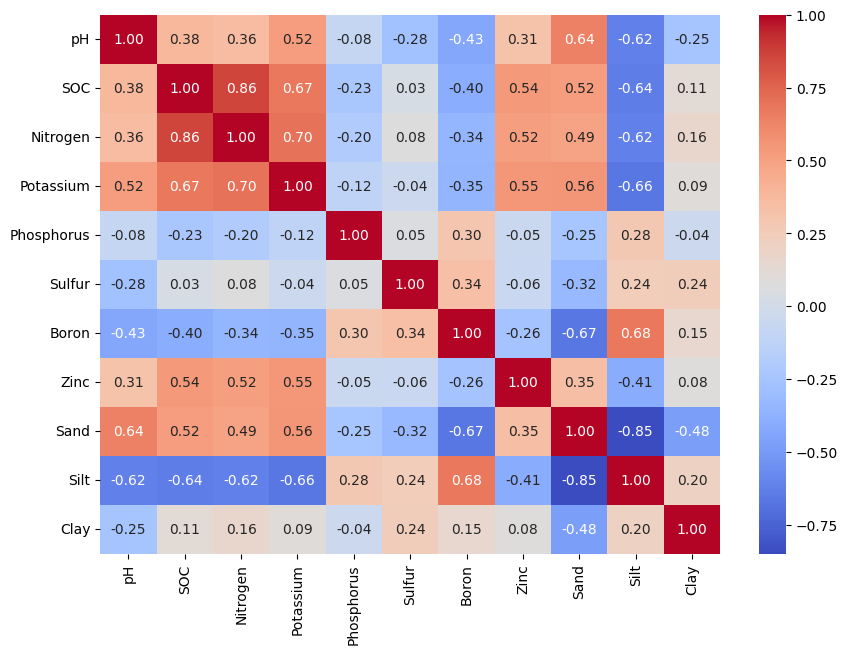

In [76]:
plt.figure(figsize=(10,7))
sns.heatmap(ipage.corr(),annot=True, cmap="coolwarm",fmt=".2f")

In [63]:
def box_hist(df):
     for col in df.columns:
        fig, axes = plt.subplots(1, 2, figsize=(8, 5))
        sns.histplot(df[col], ax=axes[0],kde=True)
        sns.boxplot(x=df[col], ax=axes[1])
        fig.suptitle(f"Distribution of {col}")
        plt.tight_layout()
        for ax in axes:
            ax.tick_params(axis='x', rotation=90)
        plt.show()
        print('\n')

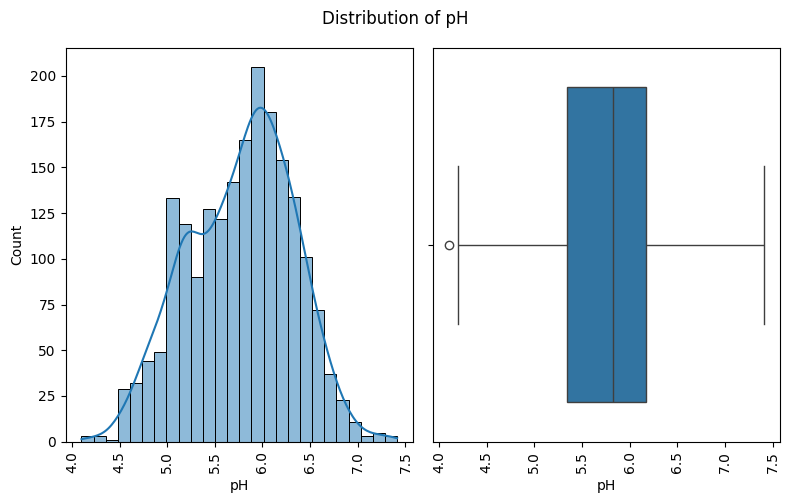

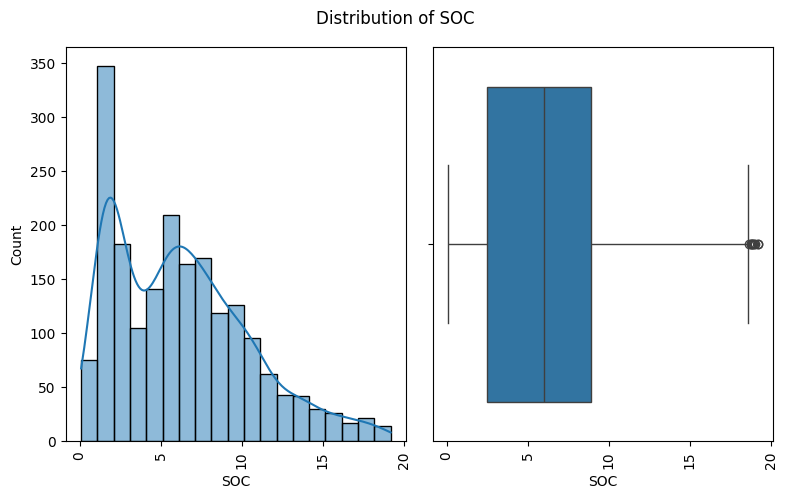

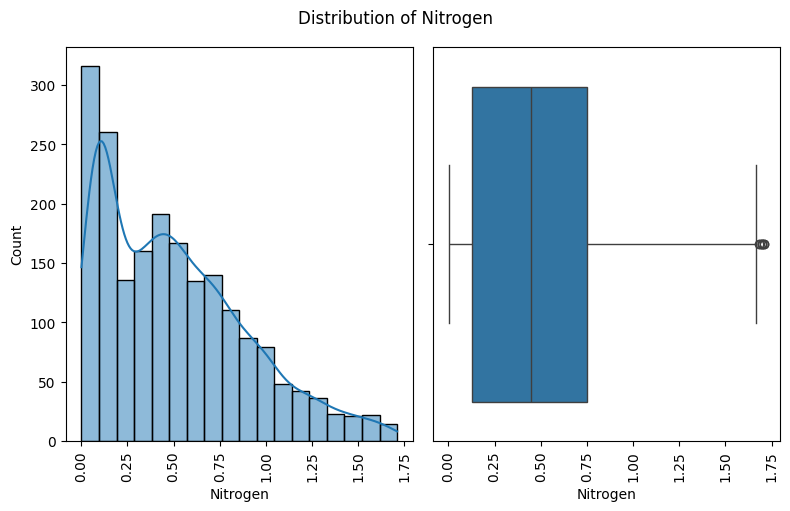

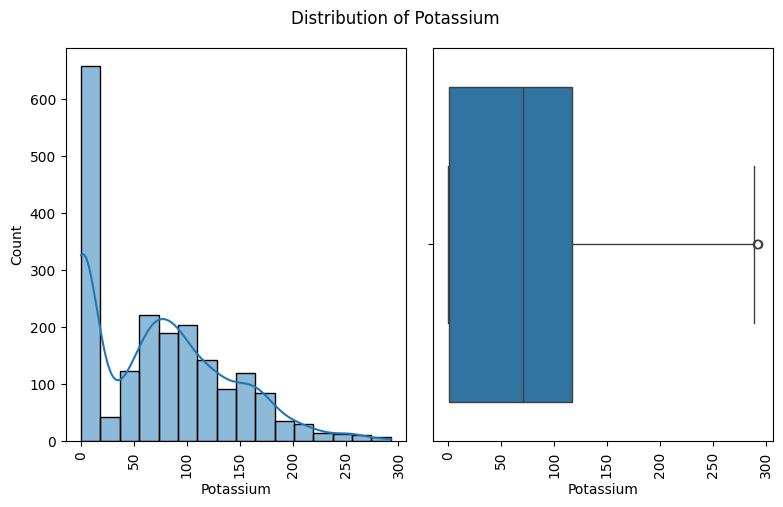

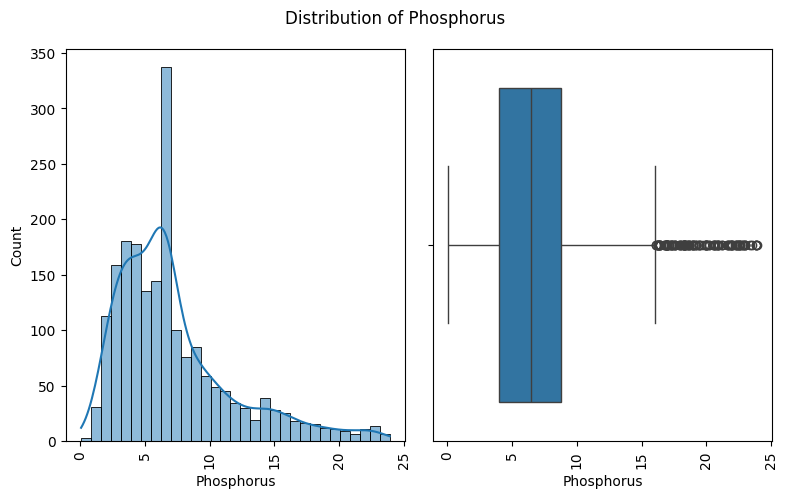

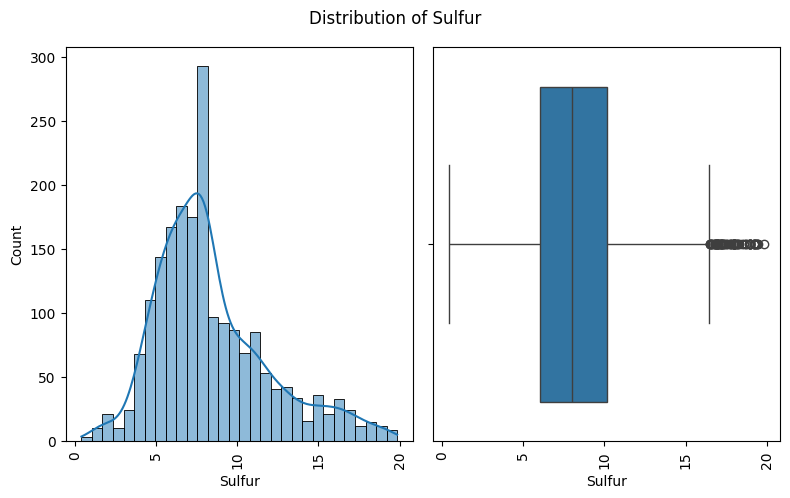

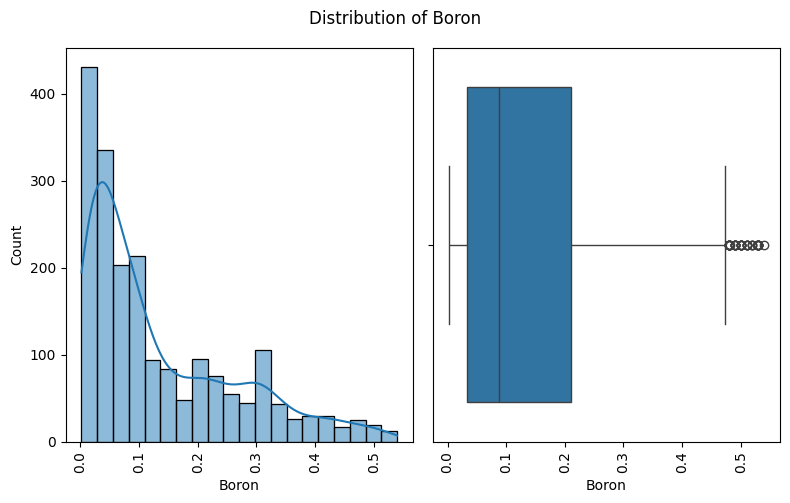

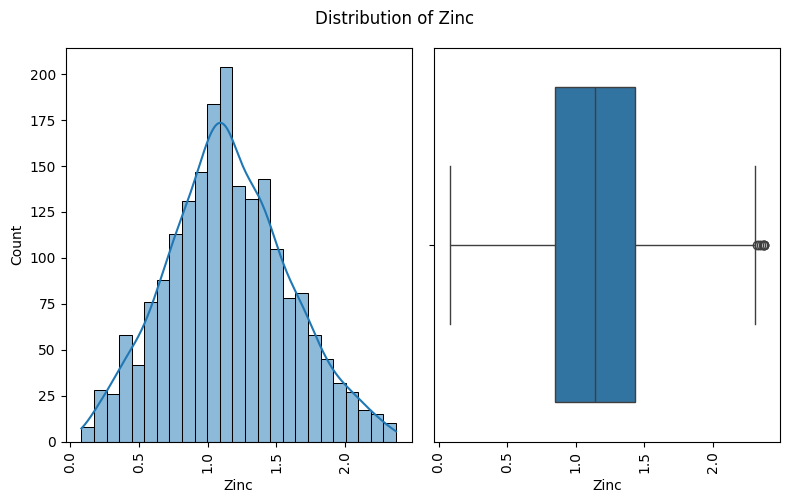

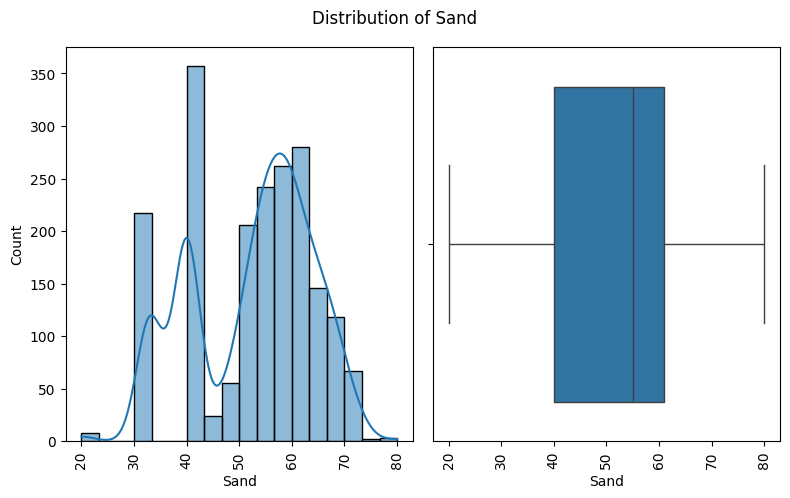

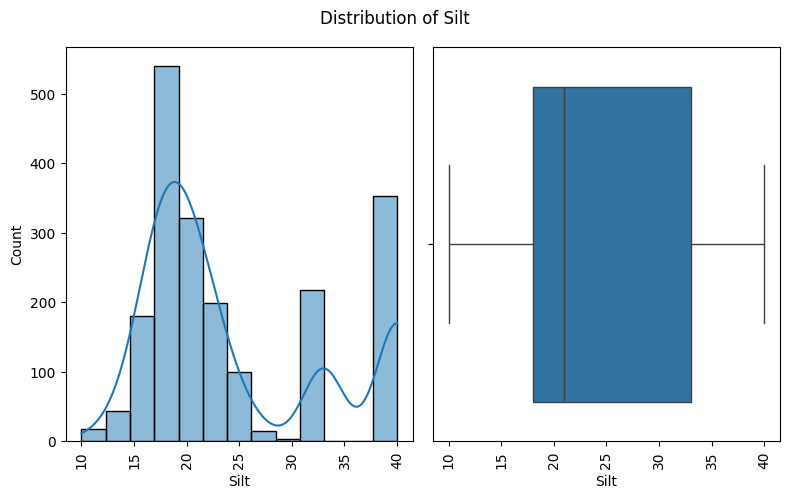

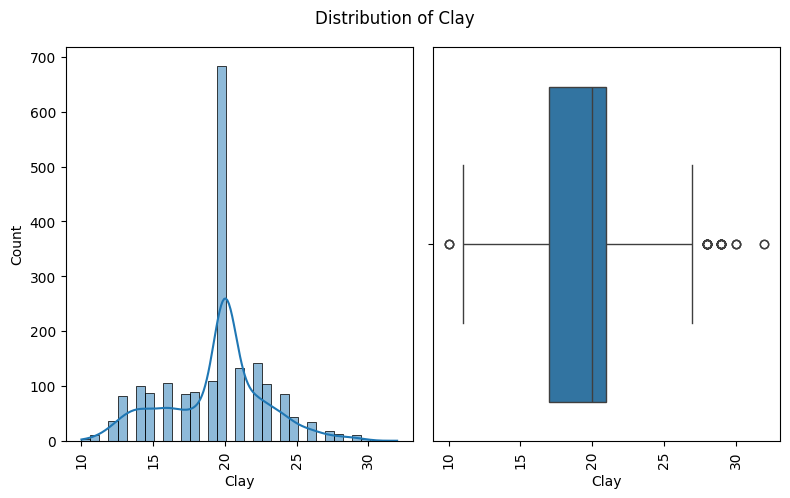

In [64]:
box_hist(ipage)

In [65]:
for i in ipage.columns:
  print(i," --> ", ipage[i].nunique(),'\n')

pH  -->  1427 

SOC  -->  1577 

Nitrogen  -->  1429 

Potassium  -->  1136 

Phosphorus  -->  1588 

Sulfur  -->  1588 

Boron  -->  1447 

Zinc  -->  1543 

Sand  -->  38 

Silt  -->  22 

Clay  -->  22 



In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(ipage)

pca = PCA()
pca_result = pca.fit_transform(data_scaled)

In [67]:
pca_result

array([[ 3.56694730e+00,  1.39869323e-02,  1.88048573e+00, ...,
        -2.27285889e-01, -6.73111491e-02, -5.35772057e-01],
       [ 3.17099809e+00, -4.68773402e-02, -1.13554003e+00, ...,
         3.10317876e-02,  6.04945095e-04, -6.09723702e-01],
       [ 3.78878693e+00,  8.69926246e-01,  6.28493082e-01, ...,
        -2.82543389e-01, -1.12914102e-01, -5.05558894e-01],
       ...,
       [-1.38426545e+00, -2.90093189e+00, -4.70571863e-01, ...,
        -4.36413264e-02, -1.81865833e-01,  1.36699268e-01],
       [-9.79523269e-01, -2.26189439e+00, -6.33234731e-01, ...,
         1.41084513e-01, -2.37461417e-02,  6.88118685e-02],
       [-1.06370401e+00, -2.75542479e+00, -4.03662480e-01, ...,
         1.82050803e-02,  5.28330442e-02, -1.45892066e-01]])

In [68]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance Ratio:")
for i, variance in enumerate(explained_variance, start=1):
    print(f"PC{i}: {variance:.4f}")

print("\nCumulative Explained Variance:")
for i, cum_var in enumerate(cumulative_variance, start=1):
    print(f"PC{i}: {cum_var:.4f}")

Explained Variance Ratio:
PC1: 0.4474
PC2: 0.1706
PC3: 0.0966
PC4: 0.0751
PC5: 0.0531
PC6: 0.0479
PC7: 0.0426
PC8: 0.0282
PC9: 0.0172
PC10: 0.0125
PC11: 0.0088

Cumulative Explained Variance:
PC1: 0.4474
PC2: 0.6180
PC3: 0.7146
PC4: 0.7897
PC5: 0.8428
PC6: 0.8908
PC7: 0.9333
PC8: 0.9615
PC9: 0.9787
PC10: 0.9912
PC11: 1.0000


In [69]:
print("\nFeature Contributions to Principal Components:")
for i, component in enumerate(pca.components_, start=1):
    print(f"\nPrincipal Component {i}:")
    for col_name, loading in zip(ipage.columns, component):
        print(f"{col_name}: {loading:.4f}")


Feature Contributions to Principal Components:

Principal Component 1:
pH: -0.3137
SOC: -0.3597
Nitrogen: -0.3498
Potassium: -0.3590
Phosphorus: 0.1373
Sulfur: 0.1105
Boron: 0.3109
Zinc: -0.2697
Sand: -0.3849
Silt: 0.4099
Clay: 0.0666

Principal Component 2:
pH: -0.2034
SOC: 0.3027
Nitrogen: 0.3431
Potassium: 0.2226
Phosphorus: 0.0123
Sulfur: 0.4479
Boron: 0.2322
Zinc: 0.2441
Sand: -0.2811
Silt: 0.1050
Clay: 0.5436

Principal Component 3:
pH: 0.2414
SOC: -0.0203
Nitrogen: 0.0099
Potassium: 0.1733
Phosphorus: 0.8449
Sulfur: 0.0154
Boron: 0.2761
Zinc: 0.2487
Sand: 0.0222
Silt: 0.0535
Clay: -0.2359

Principal Component 4:
pH: 0.0019
SOC: 0.0753
Nitrogen: 0.0997
Potassium: -0.0327
Phosphorus: -0.1230
Sulfur: 0.7358
Boron: 0.1698
Zinc: -0.2867
Sand: 0.2015
Silt: -0.0770
Clay: -0.5189

Principal Component 5:
pH: -0.3242
SOC: 0.0331
Nitrogen: -0.0360
Potassium: -0.1293
Phosphorus: -0.2915
Sulfur: -0.1009
Boron: 0.2200
Zinc: 0.7295
Sand: 0.0224
Silt: 0.1635
Clay: -0.4158

Principal Component 

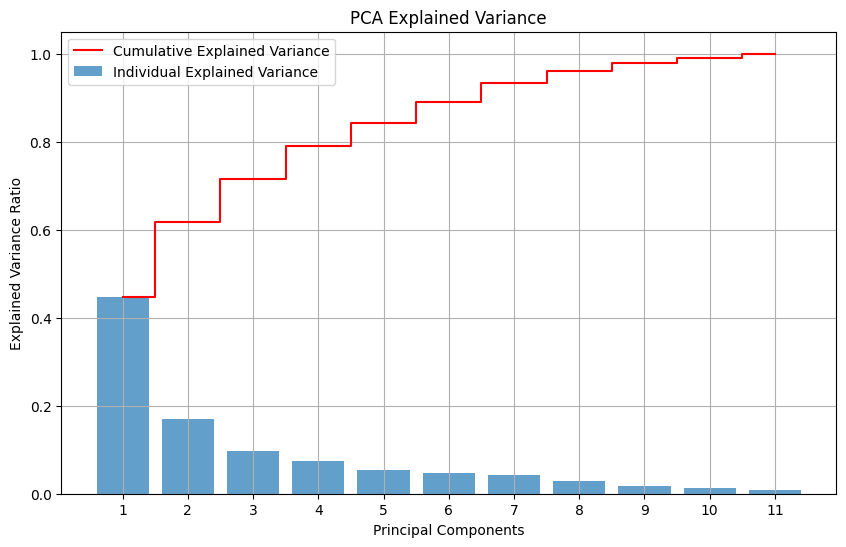

In [70]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center',
        label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative Explained Variance', color='red')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.legend(loc='best')
plt.grid()
plt.xticks(range(1, len(ipage.columns) + 1))
plt.show()

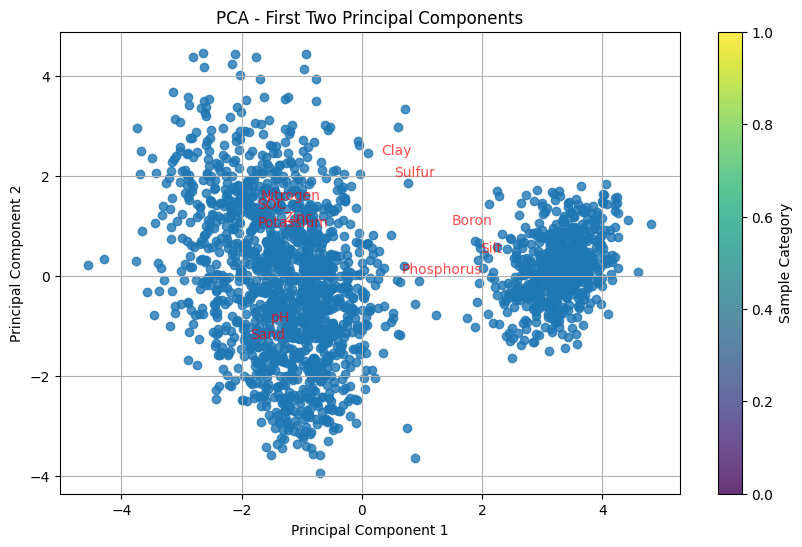

In [71]:
# Scatter Plot (First Two PCs)
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.8, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.colorbar(label='Sample Category')
plt.grid()

for i, column in enumerate(ipage.columns):
    plt.annotate(column, (pca.components_[0, i] * max(pca_result[:, 0]),
                          pca.components_[1, i] * max(pca_result[:, 1])),
                 fontsize=10, color='red', alpha=0.7)

plt.show()

In [72]:
statistics = []
for f in ipage.columns:
    stats = {
        "Feature": f,
        "Skewness": ipage[f].skew(),
        "Kurtosis": ipage[f].kurtosis(),
        "Mean": ipage[f].mean(),
        "Median": ipage[f].median(),
        "Mode": ipage[f].mode().values[0]
    }
    statistics.append(stats)

stats_df = pd.DataFrame(statistics)
stats_df

,Feature,Skewness,Kurtosis,Mean,Median,Mode
0,pH,-0.173941,-0.455638,5.773590,5.830030,5.200000
1,SOC,0.724873,-0.012554,6.319145,6.001540,6.001540
2,Nitrogen,0.804334,0.002389,0.505938,0.449810,0.090000
3,Potassium,0.629747,-0.262765,72.917125,70.589300,0.120000
4,Phosphorus,1.398819,1.794787,7.166054,6.492280,6.492280
5,Sulfur,0.925745,0.653667,8.420900,7.986040,7.986040
6,Boron,1.142633,0.363404,0.134326,0.088293,0.088293
7,Zinc,0.169790,-0.231051,1.151863,1.140000,1.140000
8,Sand,-0.385593,-0.862426,52.531454,55.000000,40.000000
9,Silt,0.809132,-0.841691,24.458983,21.000000,40.000000


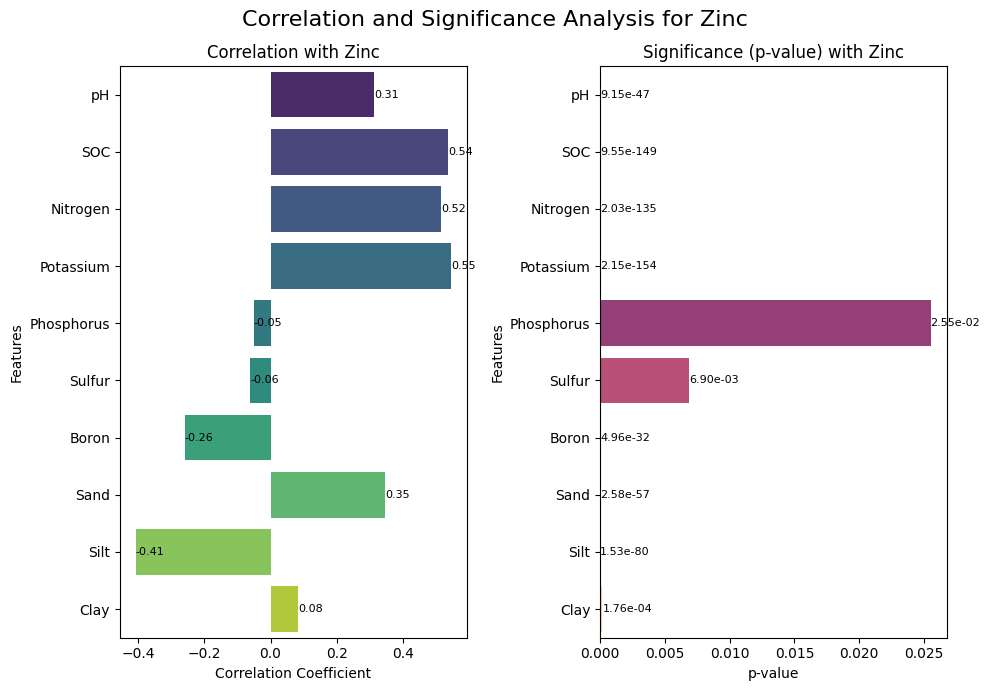

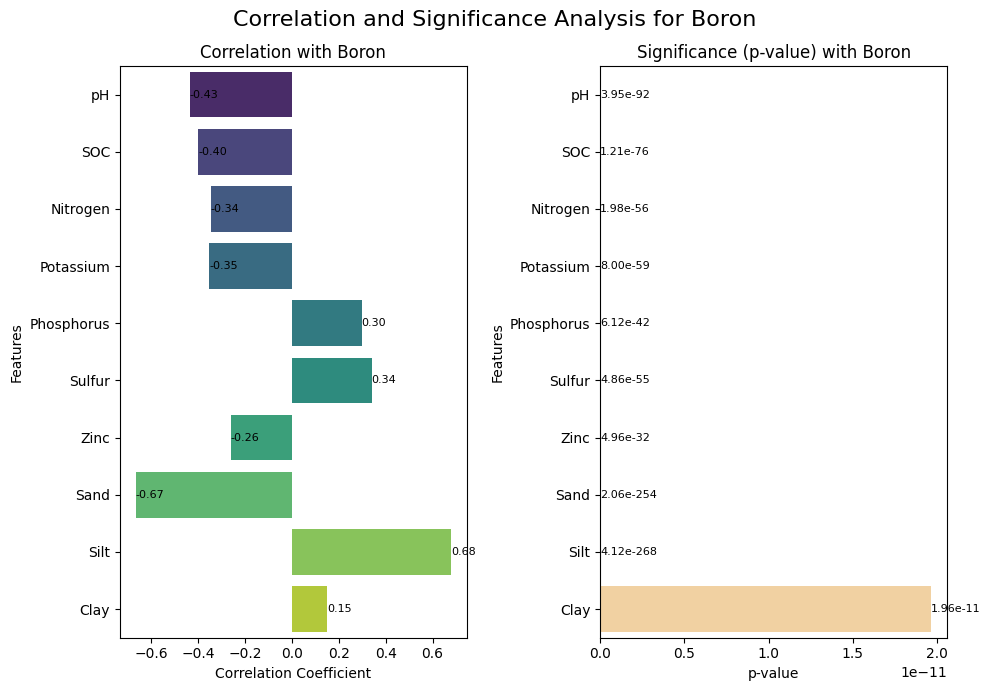

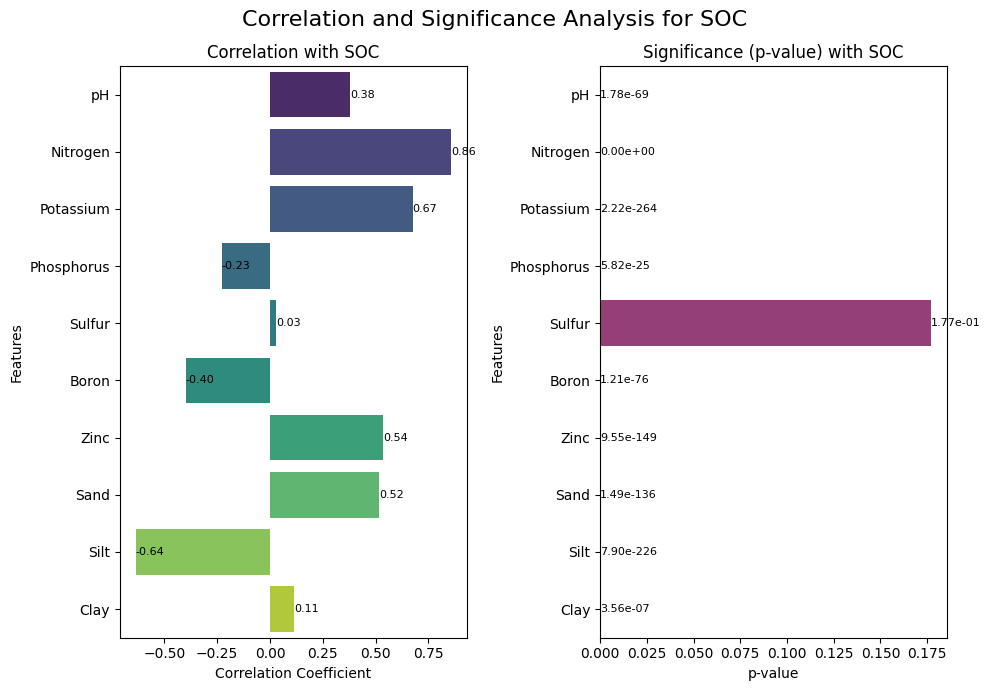

In [73]:
from scipy.stats import pearsonr

targets = ['Zinc', 'Boron', 'SOC']
numerical_columns = ipage.select_dtypes(include=[np.number]).columns

for target in targets:
    soil_features = [col for col in numerical_columns if col != target]
    corr_values = ipage[soil_features + [target]].corr()[target]
    p_values = [pearsonr(ipage[feature], ipage[target])[1] for feature in soil_features]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7))
    sns.barplot(y=soil_features, x=corr_values[soil_features].values, palette='viridis', ax=ax1)
    ax1.set_title(f'Correlation with {target}')
    ax1.set_xlabel('Correlation Coefficient')
    ax1.set_ylabel('Features')
    for i, value in enumerate(corr_values[soil_features].values):
        ax1.text(value, i, f'{value:.2f}', va='center', fontsize=8)

    sns.barplot(y=soil_features, x=p_values, palette='magma', ax=ax2)
    ax2.set_title(f'Significance (p-value) with {target}')
    ax2.set_xlabel('p-value')
    ax2.set_ylabel('Features')
    for i, value in enumerate(p_values):
        ax2.text(value, i, f'{value:.2e}', va='center', fontsize=8)

    plt.suptitle(f'Correlation and Significance Analysis for {target}', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()
    print('\n')

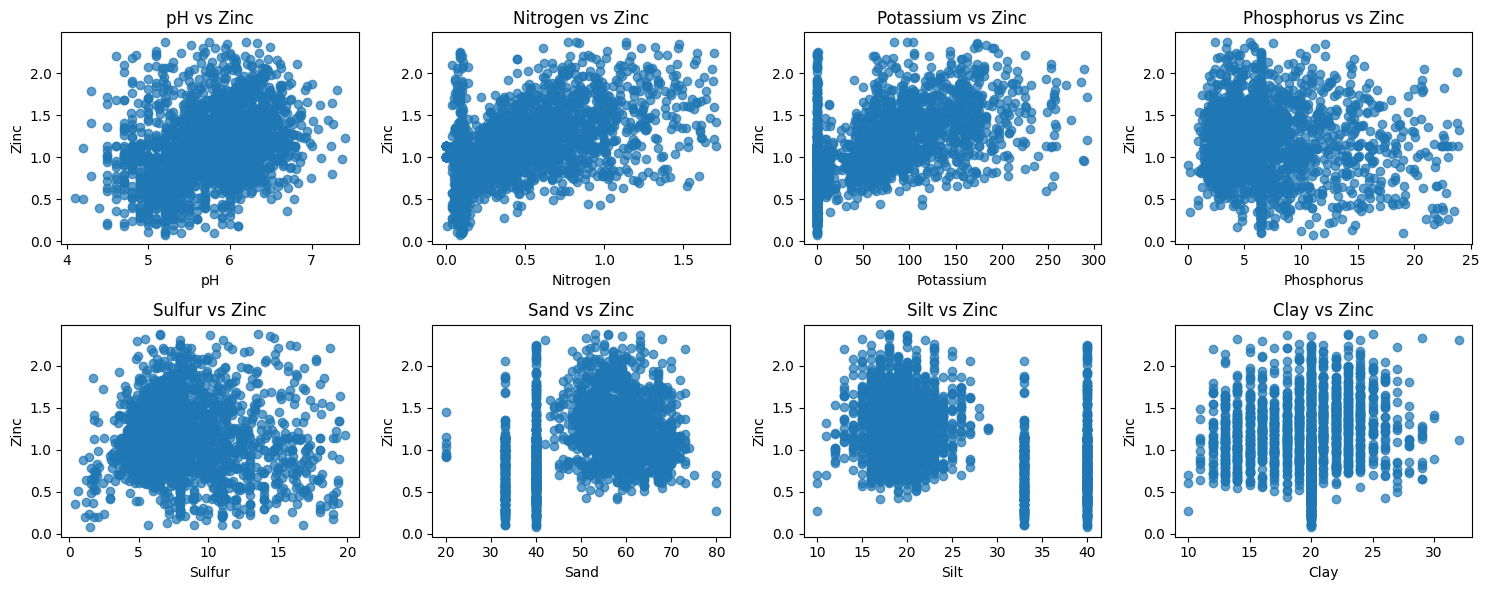

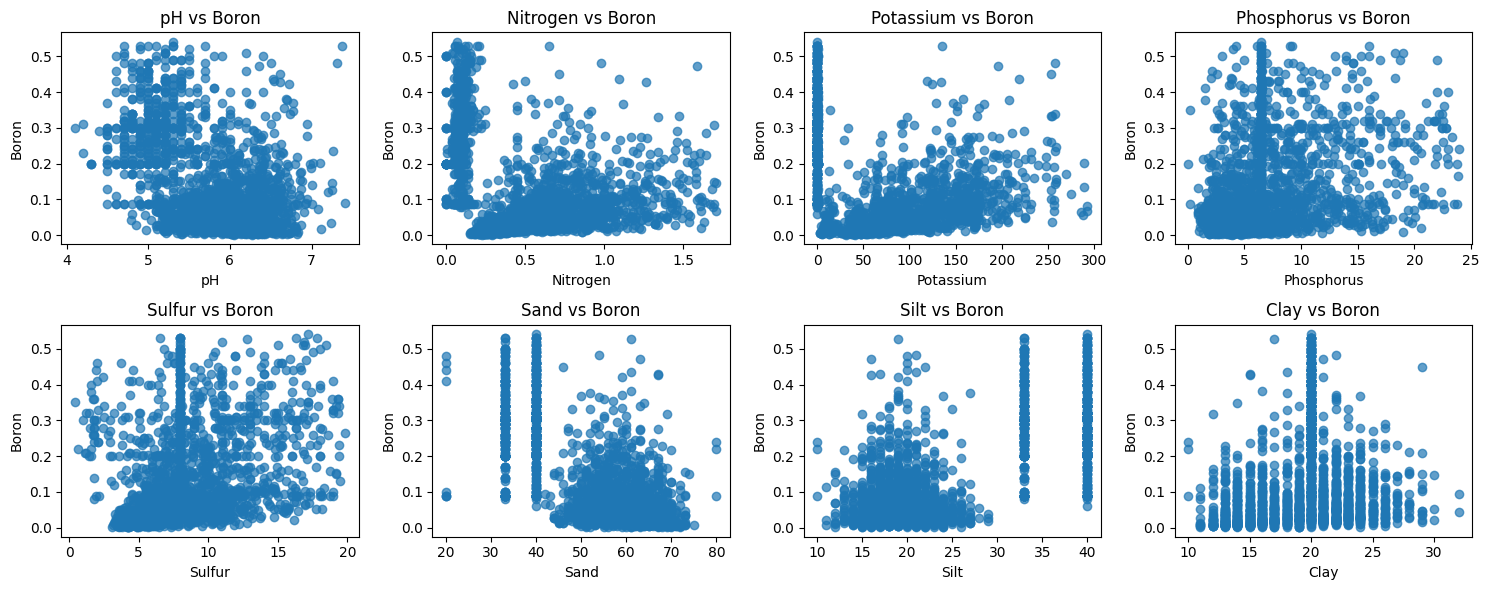

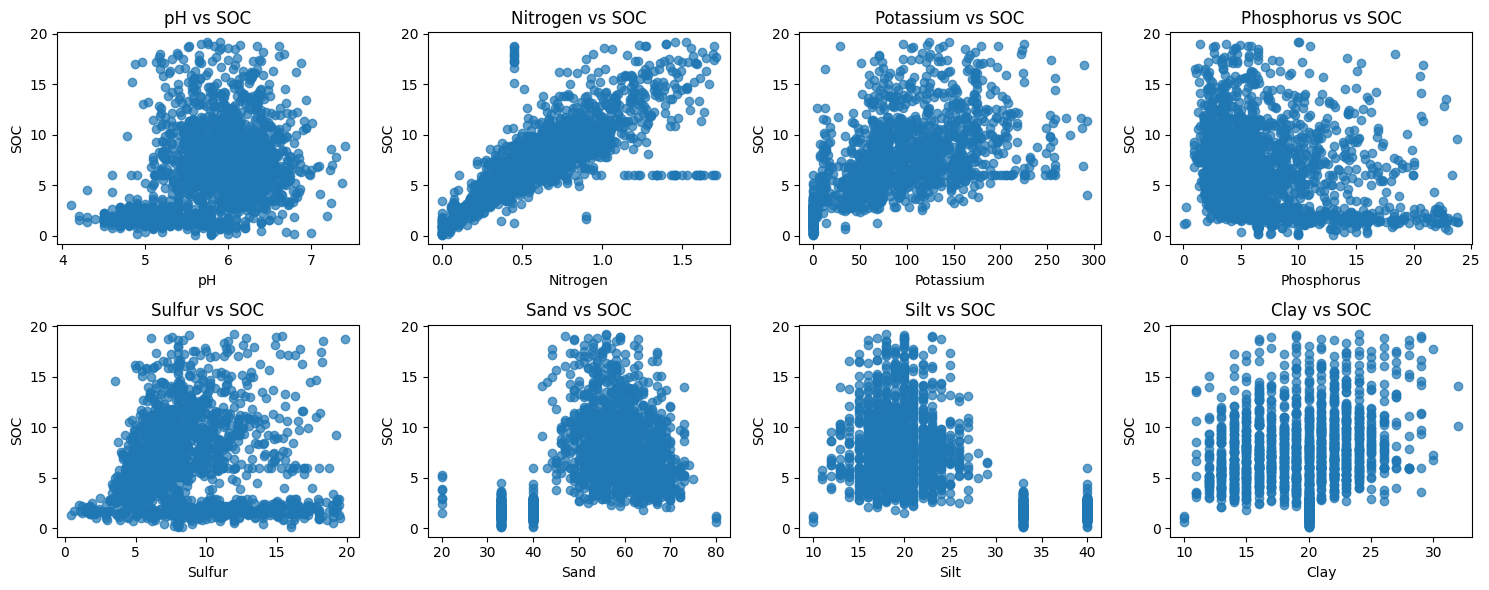

In [82]:
targets = ['Zinc', 'Boron', 'SOC']
features = [col for col in ipage.columns if col not in targets]

for target in targets:
    fig, axes = plt.subplots(len(features) // 4 + (len(features) % 4 > 0), 4, figsize=(15, 3 * (len(features) // 4 + (len(features) % 4 > 0))))
    axes = axes.flatten()

    for i, col in enumerate(features):
        axes[i].scatter(ipage[col], ipage[target], alpha=0.7)
        axes[i].set_title(f'{col} vs {target}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target)

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
    print('\n')

In [74]:
ipage.to_csv("Preprocessed IPAGE.csv", index=False)